In [1]:
import numpy as np 
import sys 
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import time
import random
import os 
from matplotlib import colors as mcolors



In [2]:
def myform(a): 
    return "{:3.1f}".format(a)
def readdata(filename, occupation): 
    unsortdata =  np.loadtxt(filename,comments="#")
    unsortsel = unsortdata[unsortdata[:,4]==occupation]
    if len(unsortsel)==0: sys.exit("no data with the required occupation")
    order = np.lexsort((-unsortsel[:,0], unsortsel[:,4], unsortsel [:,3], unsortsel[:,-1]))    
    data = np.array([unsortsel[i] for i in order ])
    return data[data[:,-1]==0],data[data[:,-1]==1]
top, bottom = readdata("/home/taranto/Documents/dmf2rg_simple/data/tpri_0.080/copiadata.dat",0.600)
    

In [3]:
def complot(x,y,col,mark,al,lin,collab = None ):
    plt.plot(x,y,color='black',linestyle=lin)
    if collab is not None: 
        plt.scatter(x,y,marker = mark,color=col,alpha=al,s=40, label = collab,edgecolor = 'black', linewidth=0.6)
    else: 
        plt.scatter(x,y,marker = mark,color=col,alpha=al,s =40, edgecolor = 'black', linewidth=0.6)   

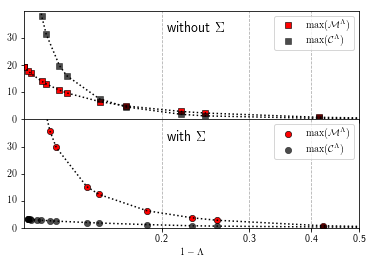

In [7]:
plt.clf()
xt= 0.205
yt= 32.
ax1 = plt.subplot(211)
complot((top[:,0]),top[:,8],'red','s',1.0,'dotted',collab=r'$\mathrm{max}(\mathcal{M}^\Lambda)$')     
complot((top[:,0]),top[:,9],'black','s',0.7,'dotted',collab=r'$\mathrm{max}(\mathcal{C}^\Lambda)$')
ax1.tick_params(axis='x',which='both',labelbottom='off')
ax2 = plt.subplot(212)
complot((bottom[:,0]),bottom[:,8],'red','o',1.0,'dotted',collab=r'$\mathrm{max}(\mathcal{M}^\Lambda)$')     
complot((bottom[:,0]),bottom[:,9],'black','o',0.7,'dotted',collab=r'$\mathrm{max}(\mathcal{C}^\Lambda)$')

for ax in (ax1,ax2):
    ax.set_xscale('log')
    ax.set_ylim([0.,40.])
    ax.set_yticks(np.arange(0.,40.,10.))
    ax.set_xticks(np.arange(0.,1.,0.1))
    ax.set_xlim([np.min([top[-1,0],bottom[-1,0]]),0.5])
    ax.xaxis.grid(linestyle = 'dashed')
    ax.legend()
ax2.set_xlabel(r'$1-\Lambda$')
ax1.text(xt,yt,r'without $\Sigma$',fontsize=14)
ax2.text(xt,yt,r'with $\Sigma$',fontsize=14)
ax2.tick_params(axis='x',which= 'major', labelbottom='on' )
ax2.tick_params(axis='x', which= 'minor', labelbottom='off')
ax2.set_xticklabels([myform(a) for a in np.arange(0.,1.,0.1)])
plt.subplots_adjust(hspace=0)
namefig = '/home/taranto/Documents/fRG_paper/images/chargeproblem.png'
plt.savefig(namefig)